In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('customer_booking.csv', encoding="ISO-8859-1")
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [4]:
data['flight_day'].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

data['flight_day'] = data['flight_day'].map(mapping)

In [6]:
data['flight_day'].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
data['booking_complete'].value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

## Descripitive Statistics

In [8]:
data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


### Check the measure of Dispersion

In [9]:
data['purchase_lead'].quantile(0.75) - data['purchase_lead'].quantile(0.25)

94.0

In [12]:
# Find out the missing values in this dataset

Missing_percenatges = (data.isnull().sum()/len(data)) * 100
Missing_percenatges

num_passengers           0.0
sales_channel            0.0
trip_type                0.0
purchase_lead            0.0
length_of_stay           0.0
flight_hour              0.0
flight_day               0.0
route                    0.0
booking_origin           0.0
wants_extra_baggage      0.0
wants_preferred_seat     0.0
wants_in_flight_meals    0.0
flight_duration          0.0
booking_complete         0.0
dtype: float64

In [13]:
# Find out the Frequency values of Data

duplicates = data.duplicated().sum()
print(f" Number of Duplicates value in the dataset = {duplicates}")

 Number of Duplicates value in the dataset = 719


In [14]:
# Drop the Duplicates

data.drop_duplicates(inplace=True)

In [15]:
data.duplicated().sum()

0

In [30]:
# shape of Dataset 

print(f" Total Shape of the dataset = {data.shape}")
print(f" Total Number of Rows = {data.shape[0]}")
print(f" Total Number of Columns = {data.shape[1]}")

 Total Shape of the dataset = (49281, 14)
 Total Number of Rows = 49281
 Total Number of Columns = 14


In [19]:
data.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

## Encoding The Data

In [37]:
from sklearn.preprocessing import OrdinalEncoder


Oe = OrdinalEncoder()
Encoding = Oe.fit_transform(data[['sales_channel', 'trip_type', 'route', 'booking_origin']])

data[['sales_channel', 'trip_type', 'route', 'booking_origin']] = Encoding

In [38]:
data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0.0,2.0,262,19,7,6,0.0,61.0,1,0,0,5.52,0
1,1,0.0,2.0,112,20,3,6,0.0,61.0,0,0,0,5.52,0
2,2,0.0,2.0,243,22,17,3,0.0,36.0,1,1,0,5.52,0
3,1,0.0,2.0,96,31,4,6,0.0,61.0,0,0,1,5.52,0
4,2,0.0,2.0,68,22,15,3,0.0,36.0,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0.0,2.0,27,6,9,6,720.0,4.0,1,0,1,5.62,0
49996,1,0.0,2.0,111,6,4,7,720.0,4.0,0,0,0,5.62,0
49997,1,0.0,2.0,24,6,22,6,720.0,4.0,0,0,1,5.62,0
49998,1,0.0,2.0,15,6,11,1,720.0,4.0,1,0,1,5.62,0


In [47]:
# Feature engineering (example: creating a new feature based on 'length_of_stay' and 'flight_duration')

data['stay_flight_ratio'] = data['length_of_stay'] / data['flight_duration']
data['stay_flight_ratio'] 

0        3.442029
1        3.623188
2        3.985507
3        5.615942
4        3.985507
           ...   
49995    1.067616
49996    1.067616
49997    1.067616
49998    1.067616
49999    1.067616
Name: stay_flight_ratio, Length: 49281, dtype: float64

In [48]:
data.dtypes

num_passengers             int64
sales_channel            float64
trip_type                float64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                    float64
booking_origin           float64
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
stay_flight_ratio        float64
dtype: object

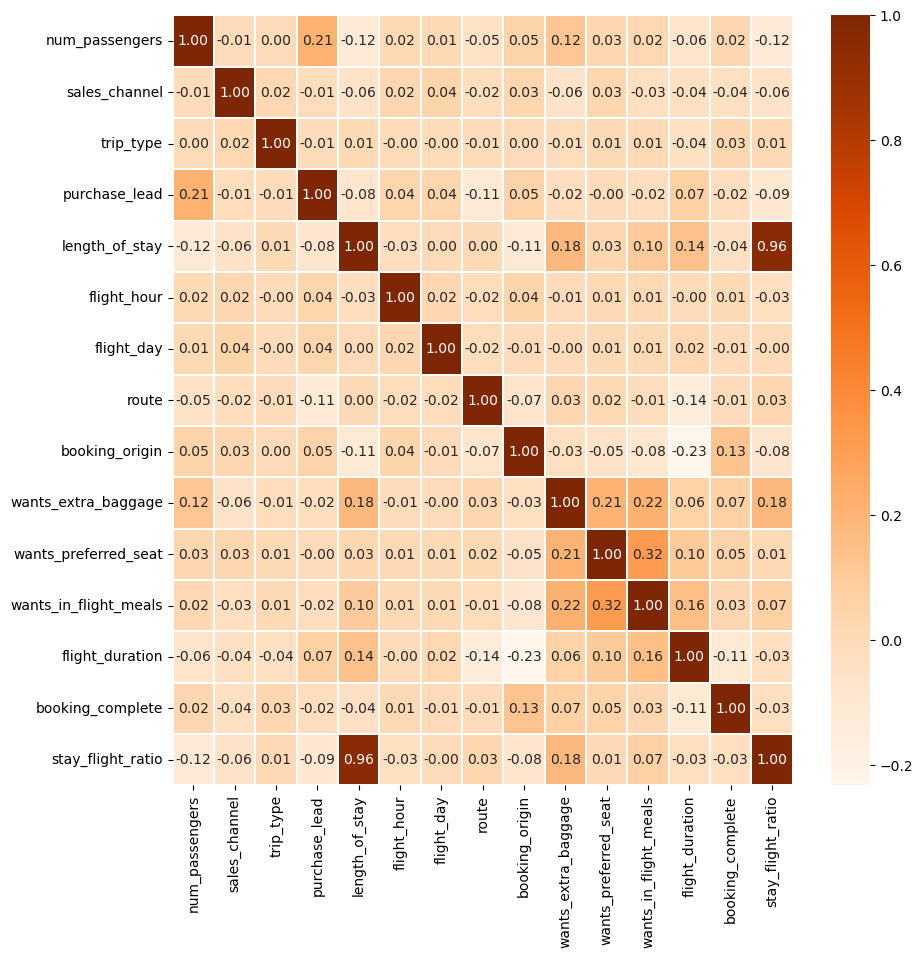

In [49]:
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, linewidths=0.05, fmt='.2f', cmap='Oranges')
plt.show()

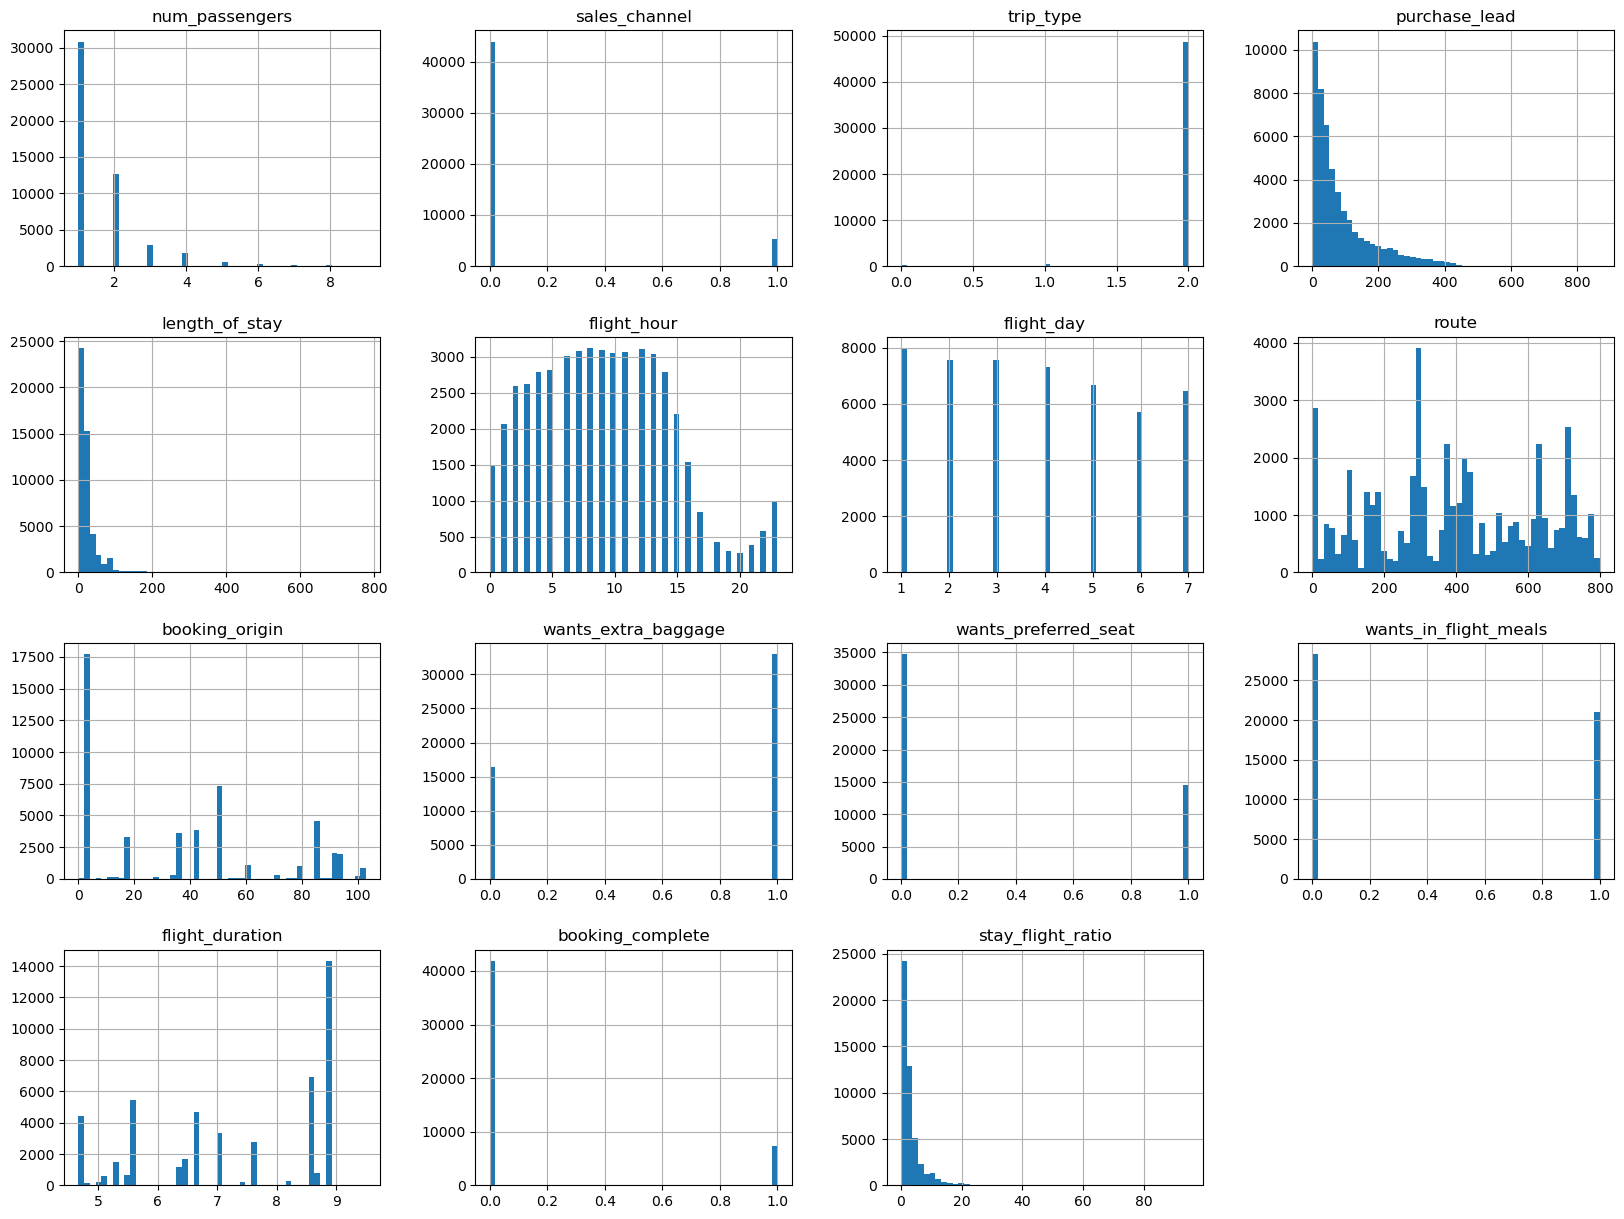

In [50]:
# Visualize distributions

data.hist(bins=50, figsize=(20, 15))
plt.show()

## Check The Outliers

<Axes: >

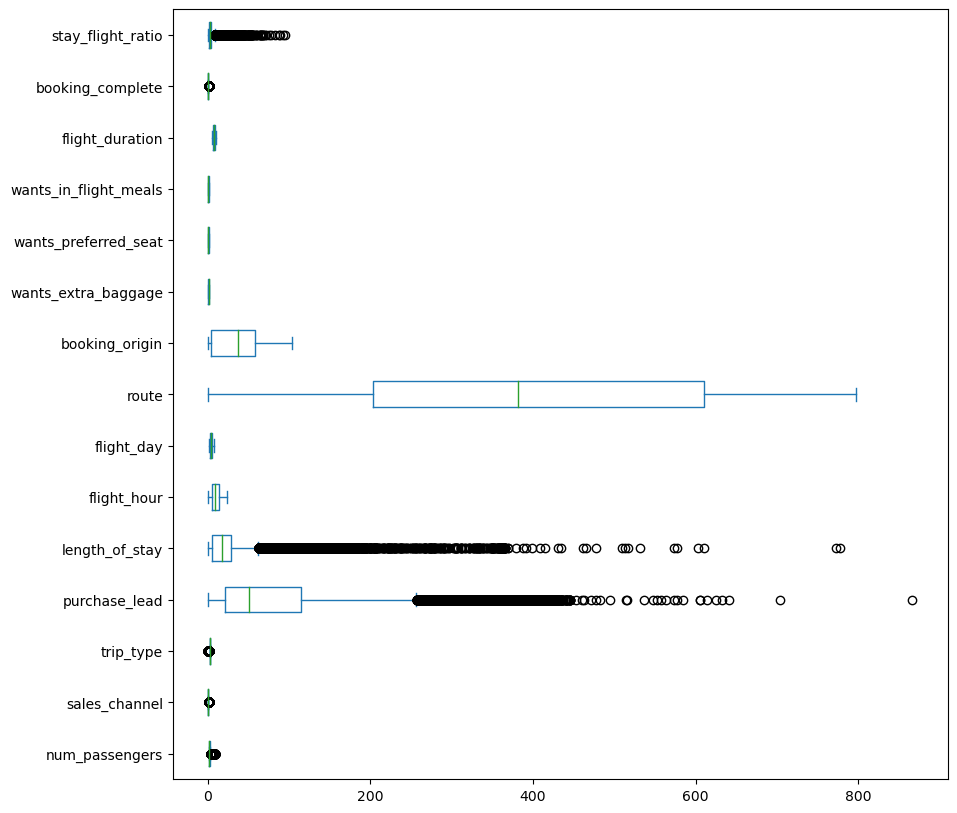

In [51]:
# Check out the outliers present in data

data.plot(kind='box', figsize=(10,10), vert = 0)

In [58]:
from scipy import stats

# Columns to treat outliers
columns_to_treat = ['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead', 'length_of_stay', 'stay_flight_ratio']

# Treat outliers using Z-score
for column in columns_to_treat:
    z_scores = np.abs(stats.zscore(data[column]))
    # Filter data where the Z-score is less than 3
    data = data[z_scores < 3]

# Display the cleaned data
print(data.shape)


(44881, 15)


<Axes: >

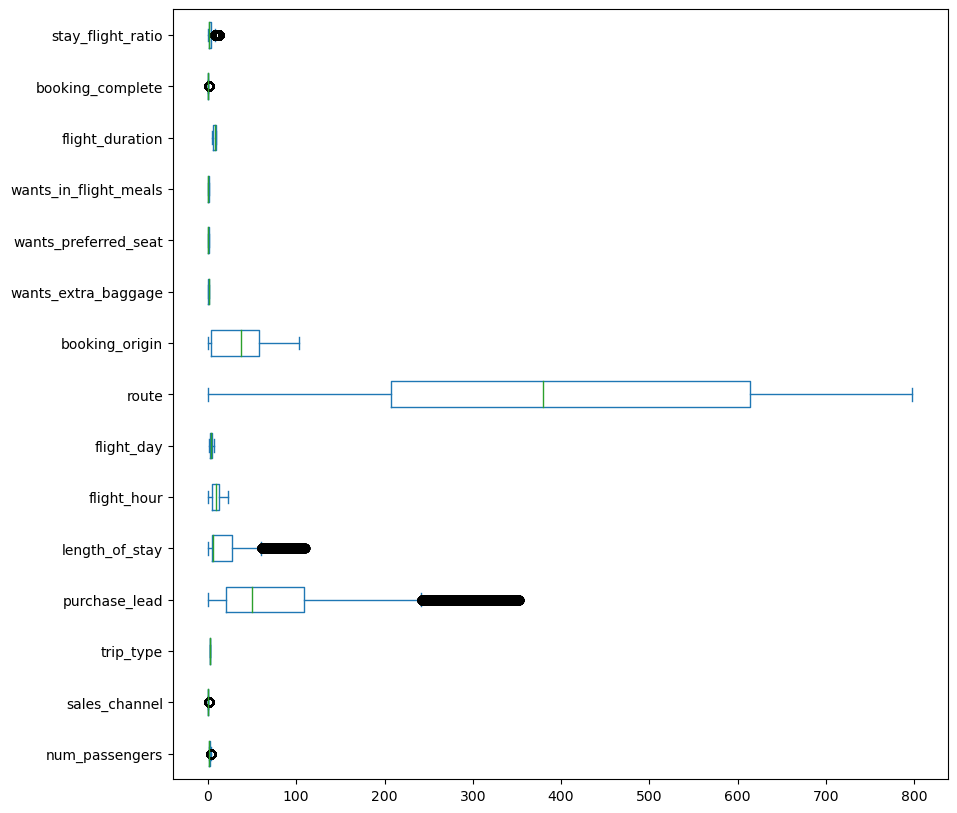

In [59]:
# After Treating the Outliers

data.plot(kind='box', figsize=(10,10), vert = 0)

In [63]:
data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,stay_flight_ratio
0,2,0.0,2.0,262,19,7,6,0.0,61.0,1,0,0,5.52,0,3.442029
1,1,0.0,2.0,112,20,3,6,0.0,61.0,0,0,0,5.52,0,3.623188
2,2,0.0,2.0,243,22,17,3,0.0,36.0,1,1,0,5.52,0,3.985507
3,1,0.0,2.0,96,31,4,6,0.0,61.0,0,0,1,5.52,0,5.615942
4,2,0.0,2.0,68,22,15,3,0.0,36.0,1,0,1,5.52,0,3.985507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0.0,2.0,27,6,9,6,720.0,4.0,1,0,1,5.62,0,1.067616
49996,1,0.0,2.0,111,6,4,7,720.0,4.0,0,0,0,5.62,0,1.067616
49997,1,0.0,2.0,24,6,22,6,720.0,4.0,0,0,1,5.62,0,1.067616
49998,1,0.0,2.0,15,6,11,1,720.0,4.0,1,0,1,5.62,0,1.067616


## Split the Data

In [65]:
from sklearn.model_selection import train_test_split


X = data.drop('booking_complete', axis=1)
y = data['booking_complete']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score



# Initialize and train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [70]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

Cross-validation scores: [0.84904609 0.8458432  0.85002089 0.85016014 0.84916435]
Mean CV score: 0.8488469339742487


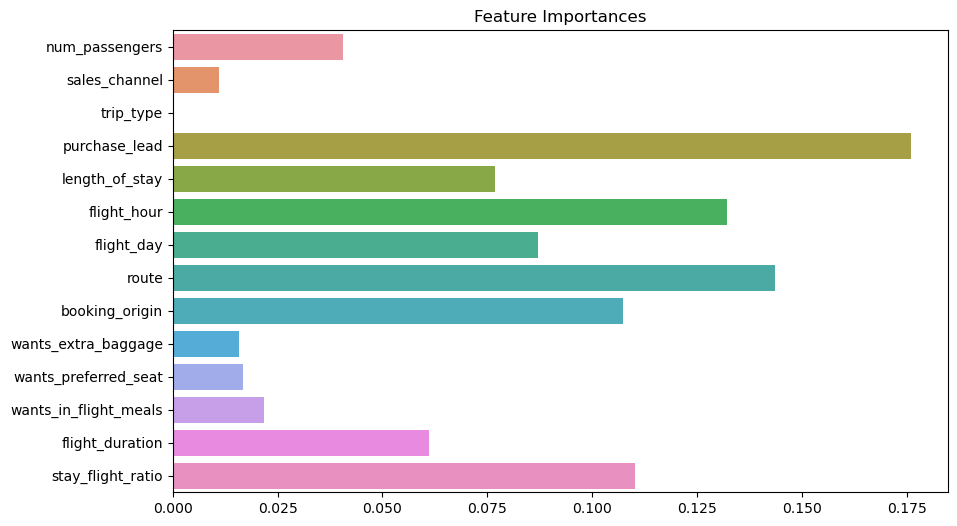

In [71]:
# Feature importance

importances = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importances')
plt.show()

In [72]:
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix

# Predict on the test set
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [73]:
# Evaluate the model

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      7635
           1       0.49      0.10      0.16      1342

    accuracy                           0.85      8977
   macro avg       0.68      0.54      0.54      8977
weighted avg       0.81      0.85      0.80      8977



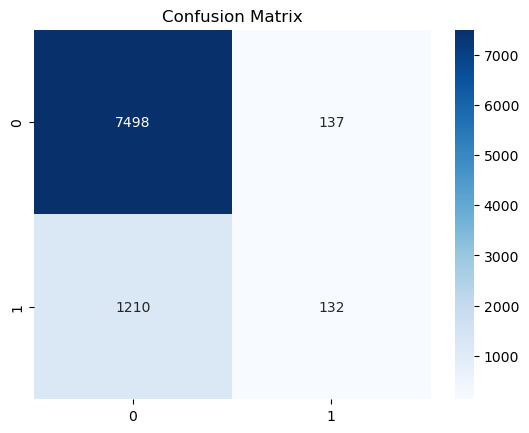

In [74]:
# Confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


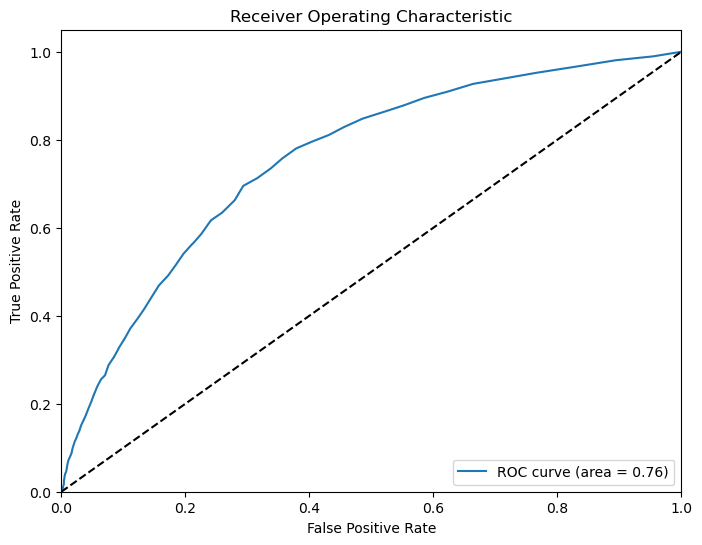

In [75]:
# ROC curve


fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()